Webscraping basic data from a table on the website:
https://sdbullion.com/silver-prices-1976

Purpose of this was without paying for the CSV to download the data from 1976 which is displayed as a table on their website.
CSV's of more recent data are easy to obtain for free, although historical data is harder to come by for the purposes of being able to inspect freely. 

In [118]:
# Libraries
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Collecting and parsing a webpage
url='https://sdbullion.com/silver-prices-1976'
# make a get request to fetch html
html_content = requests.get(url).text

#parse the html content 
soup = BeautifulSoup(html_content, 'lxml')
#print(soup.prettify())

In [121]:
# Lets play around with soup object
print(soup.title)
print(soup.title.text)


<title>Silver Prices 1976 | DAILY Prices of Silver 1976 | SD Bullion</title>
Silver Prices 1976 | DAILY Prices of Silver 1976 | SD Bullion


Extract Dollar Values 

In [122]:
# Search for Table on Silver site, loops through spans and append to values to a list.

table = soup.find('table')
#silver_price = table.tbody.find_all('td')
#print(silver_price)
p_span = table.find_all('p')

spans = []
for span in p_span:
    spans.append(span.text)
    
print(spans)

['Date', 'Silver price in US dollars per troy ounce', 'January 2, 1976', '$4.16 oz', 'January 5, 1976', '$4.20 oz', 'January 6, 1976', '$4.25 oz', 'January 7, 1976', '$4.27 oz', 'January 8, 1976', '$4.27 oz', 'January 9, 1976', '$4.23 oz', 'January 12, 1976', '$4.23 oz', 'January 13, 1976', '$4.24 oz', 'January 14, 1976', '$4.10 oz', 'January 15, 1976', '$4.14 oz', 'January 16, 1976', '$3.98 oz', 'January 19, 1976', '$4.03 oz', 'January 20, 1976', '$3.86 oz', 'January 21, 1976', '$3.83 oz', 'January 22, 1976', '$3.90 oz', 'January 23, 1976', '$3.98 oz', 'January 26, 1976', '$3.90 oz', 'January 27, 1976', '$3.90 oz', 'January 28, 1976', '$3.94 oz', 'January 29, 1976', '$4.00 oz', 'January 30, 1976', '$4.01 oz', 'February 2, 1976', '$3.99 oz', 'February 3, 1976', '$4.03 oz', 'February 4, 1976', '$3.95 oz', 'February 5, 1976', '$3.94 oz', 'February 6, 1976', '$3.99 oz', 'February 9, 1976', '$4.00 oz', 'February 10, 1976', '$3.95 oz', 'February 11, 1976', '$4.08 oz', 'February 12, 1976', '

In [124]:
# loops through spans and splits at index to extract Dollar from list and appends to a new values list.

silver_values = []
for i in spans[1::2]:
    silver_values.append(i)
#print(silver_values[1:])

# removes dollar and oz values
silver_price = []
for string in silver_values[1:]:
    silver_value = string.replace('$', '')
    silver_price.append(silver_value[:-3])
    
print(silver_price)


['4.16', '4.20', '4.25', '4.27', '4.27', '4.23', '4.23', '4.24', '4.10', '4.14', '3.98', '4.03', '3.86', '3.83', '3.90', '3.98', '3.90', '3.90', '3.94', '4.00', '4.01', '3.99', '4.03', '3.95', '3.94', '3.99', '4.00', '3.95', '4.08', '4.09', '4.10', '4.11', '4.06', '4.12', '4.12', '4.23', '4.17', '4.24', '4.26', '4.16', '4.16', '4.19', '4.15', '4.16', '4.16', '4.23', '4.26', '4.23', '4.30', '4.28', '4.26', '4.28', '4.22', '4.20', '4.26', '4.22', '4.23', '4.20', '4.20', '4.17', '4.13', '4.07', '4.03', '4.11', '4.12', '4.15', '4.09', '4.14', '4.17', '4.27', '4.28', '4.27', '4.45', '4.39', '4.40', '4.55', '4.46', '4.44', '4.41', '4.40', '4.57', '4.51', '4.43', '4.43', '4.41', '4.38', '4.36', '4.38', '4.47', '4.56', '4.47', '4.53', '4.55', '4.47', '4.51', '4.42', '4.44', '4.38', '4.46', '4.38', '4.50', '4.51', '4.67', '4.62', '4.68', '4.65', '4.64', '4.66', '4.63', '4.81', '4.76', '4.85', '4.92', '4.94', '4.91', '4.81', '4.83', '4.85', '4.79', '4.86', '4.89', '4.78', '4.77', '4.71', '4.70',

Extract Dates from spans

In [125]:
silver_dates = []
for i in spans[0::2]:
    silver_dates.append(i)
#print(silver_dates[1:])

silver_year = []
for string in silver_dates[1:]:
    silver_day = string.replace(',', '')
    silver_year.append(silver_day)
    
print(silver_year)


['January 2 1976', 'January 5 1976', 'January 6 1976', 'January 7 1976', 'January 8 1976', 'January 9 1976', 'January 12 1976', 'January 13 1976', 'January 14 1976', 'January 15 1976', 'January 16 1976', 'January 19 1976', 'January 20 1976', 'January 21 1976', 'January 22 1976', 'January 23 1976', 'January 26 1976', 'January 27 1976', 'January 28 1976', 'January 29 1976', 'January 30 1976', 'February 2 1976', 'February 3 1976', 'February 4 1976', 'February 5 1976', 'February 6 1976', 'February 9 1976', 'February 10 1976', 'February 11 1976', 'February 12 1976', 'February 13 1976', 'February 16 1976', 'February 17 1976', 'February 18 1976', 'February 19 1976', 'February 20 1976', 'February 23 1976', 'February 24 1976', 'February 25 1976', 'February 26 1976', 'February 27 1976', 'March 1 1976', 'March 2 1976', 'March 3 1976', 'March 4 1976', 'March 5 1976', 'March 8 1976', 'March 9 1976', 'March 10 1976', 'March 11 1976', 'March 12 1976', 'March 15 1976', 'March 16 1976', 'March 17 1976'

Combine into Dataframe

In [127]:
# Set price as Float, concat df's, reset_index to date, rename columns, convery to datetime.

silver_year = pd.DataFrame(silver_year)
silver_price = pd.DataFrame(silver_price, dtype='float')

silver_year
silver_price

silver_1976 = pd.concat([silver_year, silver_price], axis=1).reset_index(drop=True)
silver_1976.columns = ['Date', 'Price']
silver_1976 = silver_1976.set_index('Date')
silver_1976.index = pd.to_datetime(silver_1976.index)
silver_1976

,Price
Date,
1976-01-02,4.16
1976-01-05,4.20
1976-01-06,4.25
1976-01-07,4.27
1976-01-08,4.27
...,...
1976-12-23,4.31
1976-12-24,4.32
1976-12-29,4.35


Plot the Scrape

Text(0.5, 1.0, 'Silver Price 1976')

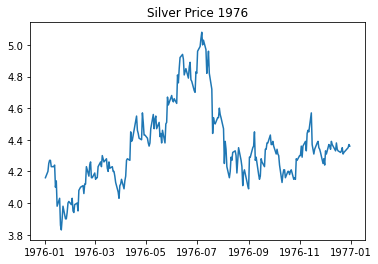

In [128]:
plt.plot(silver_1976)
plt.title('Silver Price 1976')